In [2]:
import pandas as pd
import seaborn as sns

df_trip22 = pd.read_excel('C:/Users/gmleh/OneDrive/바탕 화면/nlp/spec/문화관광 빅데이터분석대회/raw_data/국민여행조사_국내여행(2022).xlsx')

In [3]:
!pip install kmodes

from kmodes.kmodes import KModes

In [55]:
# 사용한 변수

'''
1. 총 지출(개인별 일별) : 1인지출비용 : D_TRA1_ONE_COST, D_TRA2_ONE_COST, ..., D_TRA6_ONE_COST (평균)

2. 소득 : 가구 소득 : DQ6B
  - 1. 소득없음, 2부터는 100만원씩 상승, 12 월평균 1000만원 이상 까지 총 12개 군집

3. 주요 이용 교통 수단 : 주요 교통수단 1순위만 : A1_1
  - 군집화 : :
    A : 자가용, 차량대여/렌트
    B : 철도, 항공기, 선박/해상 교통
    C : 고속/시외/시내버스, 전세/관광버스
    D : 지하철, 자전거, 택시, 기타

4. 직업 : BJOB
    1. 임금봉급근로자
    2. 고용원 있는 사업주
    3. 고용원 없는 자영자
    4. 무급가족 종사자
    5. 전업주부
    6. 학생
    7. 기타

5. 여행 기간: D_TRA1_S_Day, D_TRA2_S_Day, ..., D_TRA6_S_Day (평균) 당
  - 0(당일치기), 1(1박2일), 2(2박3일 이상)

6. 여행지 선택 이유 1순위만 : A4_1
  - 군집화 : 
    '여행지 특징' : 볼거리 제공(2), 여행지 지명도(1)
    '소통?': 쇼핑(7), 음식(8), 여행 동반자 유형(14), 경험자의 추천(11)
    '편의성': 숙박시설(6), 관광지 편의시설(12)
    '가성비': 여행할 수 있는 시간(5), 저렴한 여행경비(3), 이동거리(4), 교통편(9)
    '교육' : 체험 프로그램 유무(10), 교육성(13), 기타(15)

ㅇ연령 : BAGE
  - 50대/60대만
  
  연령(BAGE) & 성별(BSEX) & 동행자 수(A7) & 여행정보 획득 경로(A6_1)
  여행정보 획득 경로
    1. 인터넷 사이트/모바일 앱
    2. 기사 및 방송 프로그램
    3. 광고
    4. 여행사
    5. 주변인
    6. 관광 안내 서적
    7. 과거 방문 경험
    8. 정보 없이 방문
    9. 기타
'''

"\n1. 총 지출(개인별 일별) : 1인지출비용 : D_TRA1_ONE_COST, D_TRA2_ONE_COST, ..., D_TRA6_ONE_COST (평균)\n\n2. 소득 대비 지출 : 가구 소득 : DQ6B\n\n3. 주요 이용 교통 수단 : 주요 교통수단 1순위만 : A1_1\n  - 군집화 : :\n    A : 자가용, 차량대여/렌트\n    B : 철도, 항공기, 선박/해상 교통\n    C : 고속/시외/시내버스, 전세/관광버스\n    D : 지하철, 자전거, 택시, 기타\n\n4. 직업 : BJOB\n\n5. 여행 기간: D_TRA1_S_Day, D_TRA2_S_Day, ..., D_TRA6_S_Day (평균) 당\n\n6. 여행지 선택 이유 1순위만 : A4_1\n  - 군집화 : \n    '여행지 특징' : 볼거리 제공(2), 여행지 지명도(1)\n    '소통?': 쇼핑(7), 음식(8), 여행 동반자 유형(14), 경험자의 추천(11)\n    '편의성': 숙박시설(6), 관광지 편의시설(12)\n    '가성비': 여행할 수 있는 시간(5), 저렴한 여행경비(3), 이동거리(4), 교통편(9)\n    '교육' : 체험 프로그램 유무(10), 교육성(13), 기타(15)\n\nㅇ연령 : BAGE\n"

In [4]:
keep_col = ['국내_여행여부', 'ID','D_TRA1_ONE_COST', 'D_TRA2_ONE_COST', 'D_TRA3_ONE_COST', 'D_TRA4_ONE_COST', 'BSEX', 'A7', 
            'D_TRA5_ONE_COST', 'D_TRA6_ONE_COST', 'DQ6B', 'A1_1', 'SA1_1', 'SA1_2',
            'D_TRA1_S_Day', 'D_TRA2_S_Day', 'D_TRA3_S_Day', 'D_TRA4_S_Day',
            'D_TRA5_S_Day', 'D_TRA6_S_Day', 'A4_1', 'BAGE', 'BJOB', 'A6_1']

df = df_trip22[keep_col]

In [5]:
# 50, 60대만

senior_df = df[df['BAGE'].isin([5, 6])]
len(senior_df)

18779

In [6]:
# 국내 여행을 다녀온 적 있는 사람만

senior_df = senior_df[senior_df['국내_여행여부'].isin([1])]
len(senior_df)

7694

In [7]:
# 개인별 일별 평균 지출

senior_df['DAY_AVG_COST'] = senior_df[['D_TRA1_ONE_COST', 'D_TRA2_ONE_COST', 'D_TRA3_ONE_COST', 
                     'D_TRA4_ONE_COST', 'D_TRA5_ONE_COST', 'D_TRA6_ONE_COST']].mean(axis=1)

# 일별 지출 4분위수 기준으로 나누기(분류, A가 가장 적게 내는 그룹)

senior_df['Cost_Quantile'] = pd.qcut(senior_df['DAY_AVG_COST'], 4, labels=['A', 'B', 'C', 'D'])

In [305]:
senior_df['DAY_AVG_COST'].describe()

count    7.694000e+03
mean     1.203981e+05
std      1.399694e+05
min      1.000000e+03
25%      5.000000e+04
50%      7.500000e+04
75%      1.400000e+05
max      3.925000e+06
Name: DAY_AVG_COST, dtype: float64

<AxesSubplot:xlabel='DAY_AVG_COST'>

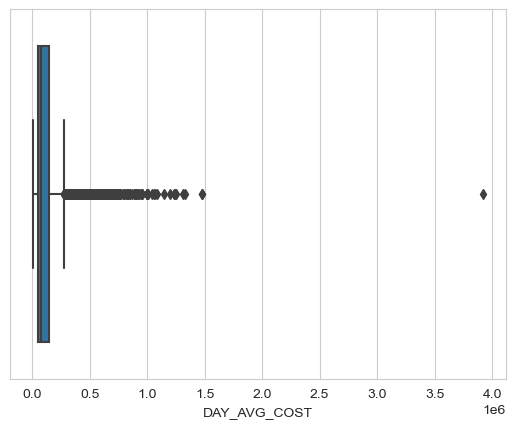

In [131]:
sns.boxplot(x=senior_df['DAY_AVG_COST'])

In [8]:
# 개인별 평균 여행 기간

senior_df['AVG_TRAVEL_PERIOD'] = senior_df[['D_TRA1_S_Day', 'D_TRA2_S_Day', 'D_TRA3_S_Day', 
                     'D_TRA4_S_Day', 'D_TRA5_S_Day', 'D_TRA6_S_Day']].mean(axis=1)

# 여행 기간 소숫점 첫째자리에서 반올림

senior_df['AVG_TRAVEL_PERIOD'] = senior_df['AVG_TRAVEL_PERIOD'].round(0)

# 여행 기간 군집

for i in senior_df.index:
    if senior_df.loc[i, 'AVG_TRAVEL_PERIOD'] == 0.0:
        senior_df.loc[i, 'AVG_TRAVEL_PERIOD'] = 'A' # 0
    elif senior_df.loc[i, 'AVG_TRAVEL_PERIOD'] == 1.0:
        senior_df.loc[i, 'AVG_TRAVEL_PERIOD'] = 'B' # 1
    else:senior_df.loc[i, 'AVG_TRAVEL_PERIOD'] = 'C' # 2 이상

In [9]:
# 여행지 선택 이유 분류

senior_df['여행지_선택'] = '0'

# 여행지_선택 열의 값을 문자열로 변환하고, 조건에 맞게 값을 변경
for i in senior_df.index:
    if senior_df.loc[i, 'A4_1'] == 1.0 or senior_df.loc[i, 'A4_1'] == 2.0:
        senior_df.loc[i, '여행지_선택'] = 'A' # 여행지 특징
    elif senior_df.loc[i, 'A4_1'] == 7.0 or senior_df.loc[i, 'A4_1'] == 8.0 or senior_df.loc[i, 'A4_1'] == 11.0 or senior_df.loc[i, 'A4_1'] == 14.0:
        senior_df.loc[i, '여행지_선택'] = 'B' # 소통?
    elif senior_df.loc[i, 'A4_1'] == 6.0 or senior_df.loc[i, 'A4_1'] == 12.0:
        senior_df.loc[i, '여행지_선택'] = 'C' # 편의성
    elif senior_df.loc[i, 'A4_1'] == 3.0 or senior_df.loc[i, 'A4_1'] == 4.0 or senior_df.loc[i, 'A4_1'] == 5.0 or senior_df.loc[i, 'A4_1'] == 9.0:
        senior_df.loc[i, '여행지_선택'] = 'D' # 가성비
    elif senior_df.loc[i, 'A4_1'] == 15.0 or senior_df.loc[i, 'A4_1'] == 10.0 or senior_df.loc[i, 'A4_1'] == 13.0:
        senior_df.loc[i, '여행지_선택'] = 'E' # 교육 & 기타


In [10]:
# 교통 수단 분류

senior_df['교통_선택'] = '0'

# '교통_선택' 열의 값을 문자열로 변환하고, 조건에 맞게 값을 변경
for i in senior_df.index:
    if senior_df.loc[i, 'A1_1'] == 1.0 or senior_df.loc[i, 'A1_1'] == 8.0:
        senior_df.loc[i, '교통_선택'] = 'A' # 자가용, 차량대여/렌트
    elif senior_df.loc[i, 'A1_1'] == 2.0 or senior_df.loc[i, 'A1_1'] == 3.0 or senior_df.loc[i, 'A1_1'] == 4.0:
        senior_df.loc[i, '교통_선택'] = 'B' # 철도, 항공기, 선박/해상 교통
    elif senior_df.loc[i, 'A1_1'] == 6.0 or senior_df.loc[i, 'A1_1'] == 7.0:
        senior_df.loc[i, '교통_선택'] = 'C' # 고속/시외/시내버스, 전세/관광버스
    elif senior_df.loc[i, 'A1_1'] == 5.0 or senior_df.loc[i, 'A1_1'] == 9.0 or senior_df.loc[i, 'A1_1'] == 10.0 or senior_df.loc[i, 'A1_1'] == 11.0:
        senior_df.loc[i, '교통_선택'] = 'D' # 지하철, 자전거, 택시, 기타


In [13]:
# 필요없는 열 삭제

senior_df.drop(columns=[f'D_TRA{i}_S_Day' for i in range(1, 7)], inplace=True)
senior_df.drop(columns=[f'D_TRA{i}_ONE_COST' for i in range(1, 7)], inplace=True)
senior_df.drop(columns=['DAY_AVG_COST', '국내_여행여부', 'ID', 'A1_1', 'A4_1'], inplace=True)

# 나이 열 삭제

senior_df.drop(columns=['BAGE'], inplace=True)

In [15]:
senior_df.drop(columns=['BSEX'], inplace=True)
senior_df.drop(columns=['A7'], inplace=True)
senior_df.drop(columns=['A6_1'], inplace=True)
senior_df.drop(columns=['SA1_1'], inplace=True)
senior_df.drop(columns=['SA1_2'], inplace=True)

In [16]:
# 최종 열(변수) 확인

senior_df.head()

# DQ6B(월평균 가구 소득)
# BJOB(직업)
# Cost_Quantile 여행 비용 4분위수로 나눈거
# AVG_TRAVEL_PERIOD 평균 여행 기간(0/1/2)

,DQ6B,BJOB,Cost_Quantile,AVG_TRAVEL_PERIOD,여행지_선택,교통_선택
6,7,1,D,C,A,A
9,7,11,D,C,A,B
18,4,4,A,A,A,A
29,6,3,C,B,B,A
34,8,1,B,A,B,A


In [87]:
# 나이 열인데, 각각이 뭘 의미하는지는 대조해봐야 할 듯

senior_df['BJOB'].unique()

array([ 1, 11,  4,  3, 13,  2, 12], dtype=int64)

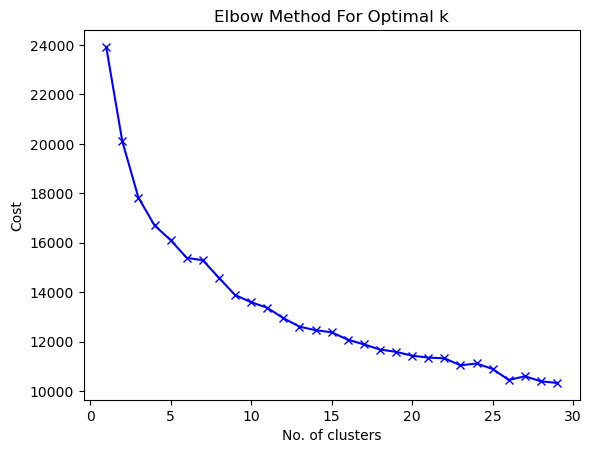

In [86]:
# Elbow curve 로 적절한 K 찾기(나이 없앤거)

cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=0)
    kmode.fit_predict(senior_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
# 군집화

number_K = 6

kmode = KModes(number_K)
clusters = kmode.fit_predict(senior_df.values)

senior_df['cluster'] = clusters + 1
senior_df.head()



,DQ6B,BJOB,Cost_Quantile,AVG_TRAVEL_PERIOD,여행지_선택,교통_선택,cluster
6,7,1,D,C,A,A,5
9,7,11,D,C,A,B,5
18,4,4,A,A,A,A,1
29,6,3,C,B,B,A,2
34,8,1,B,A,B,A,1


<AxesSubplot:xlabel='cluster', ylabel='count'>

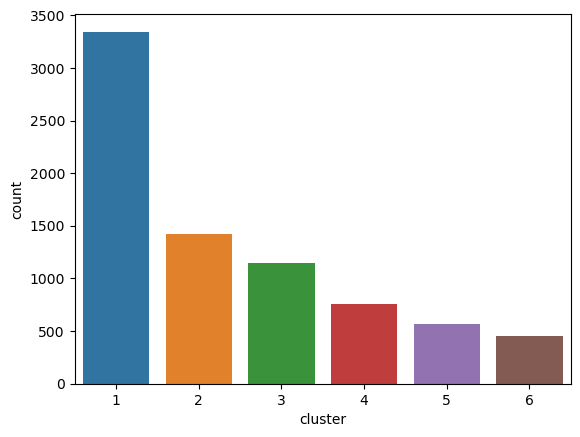

In [18]:
# 군집별 인원 수 시각화

# senior_df['cluster']

sns.countplot(x = 'cluster', data = senior_df)

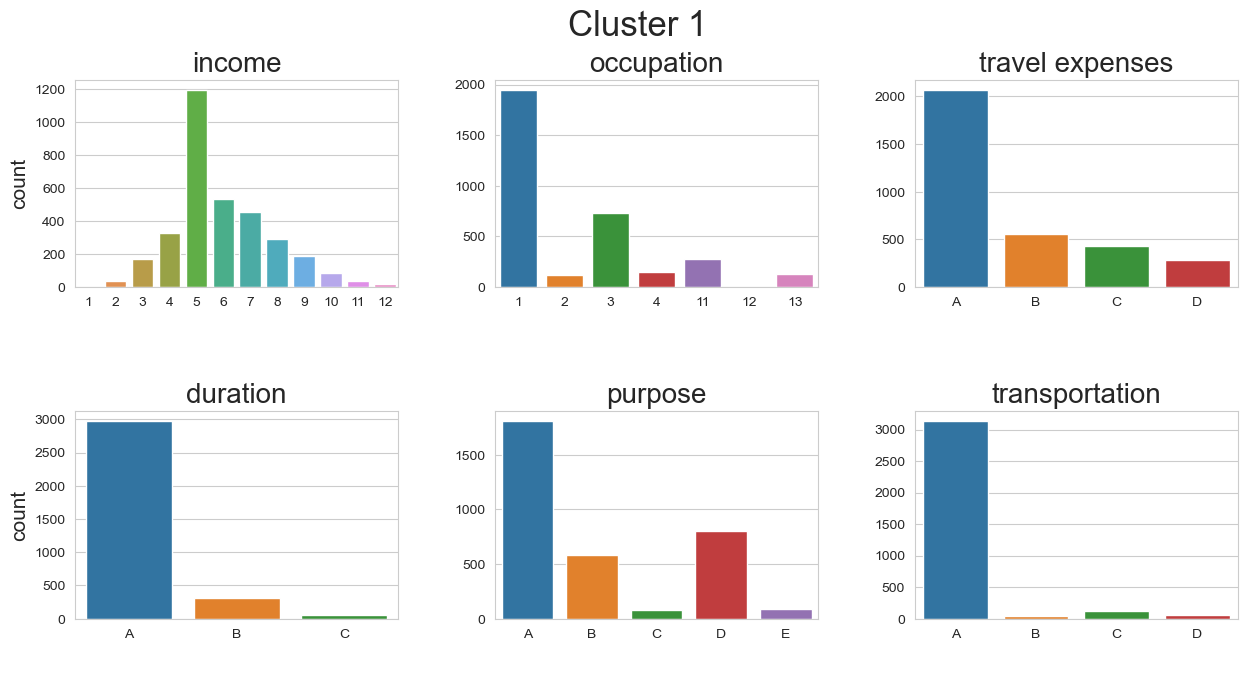

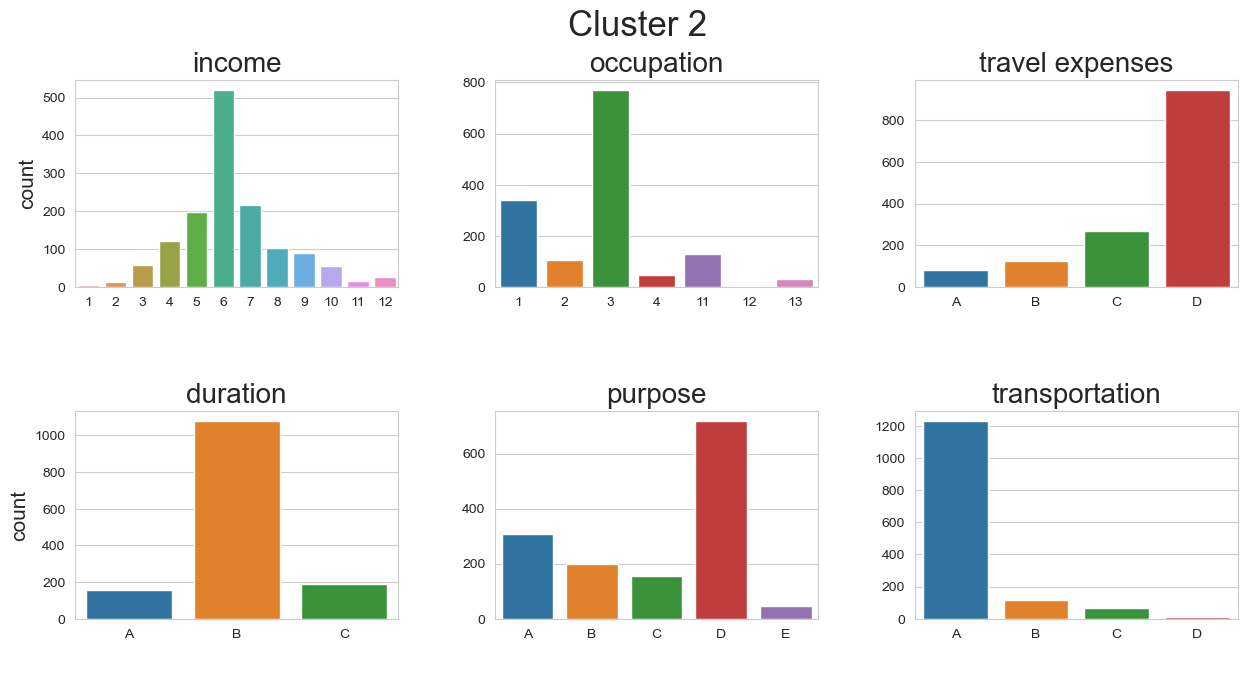

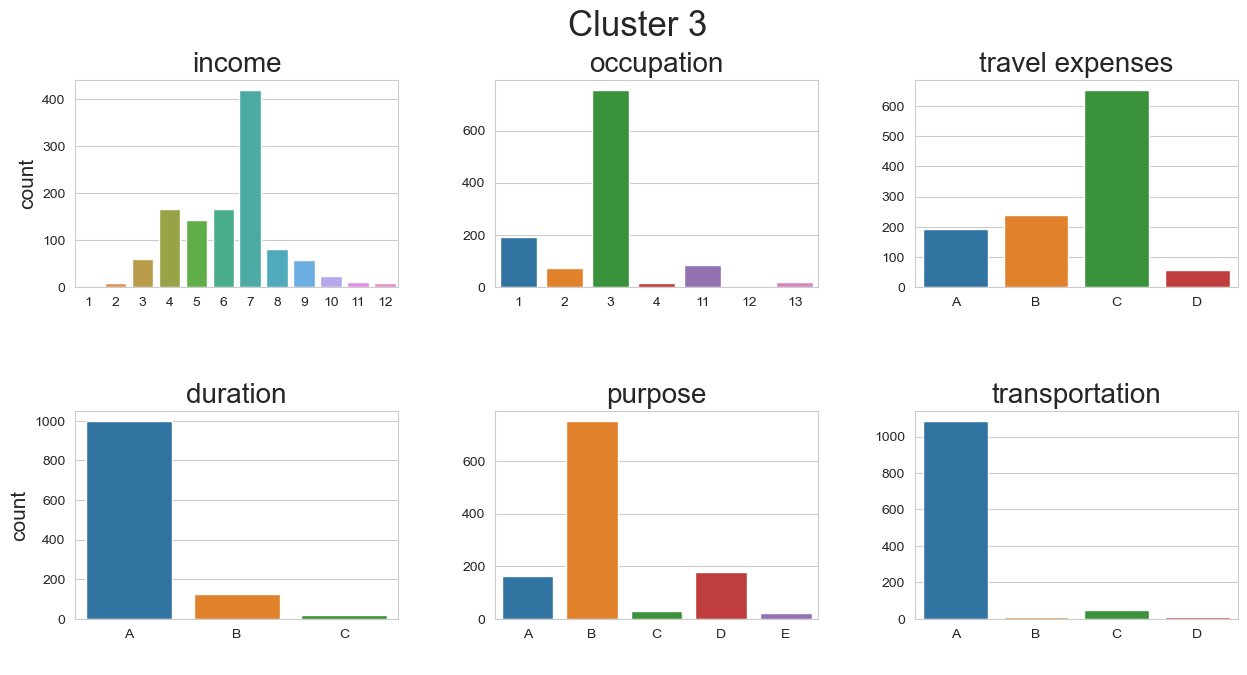

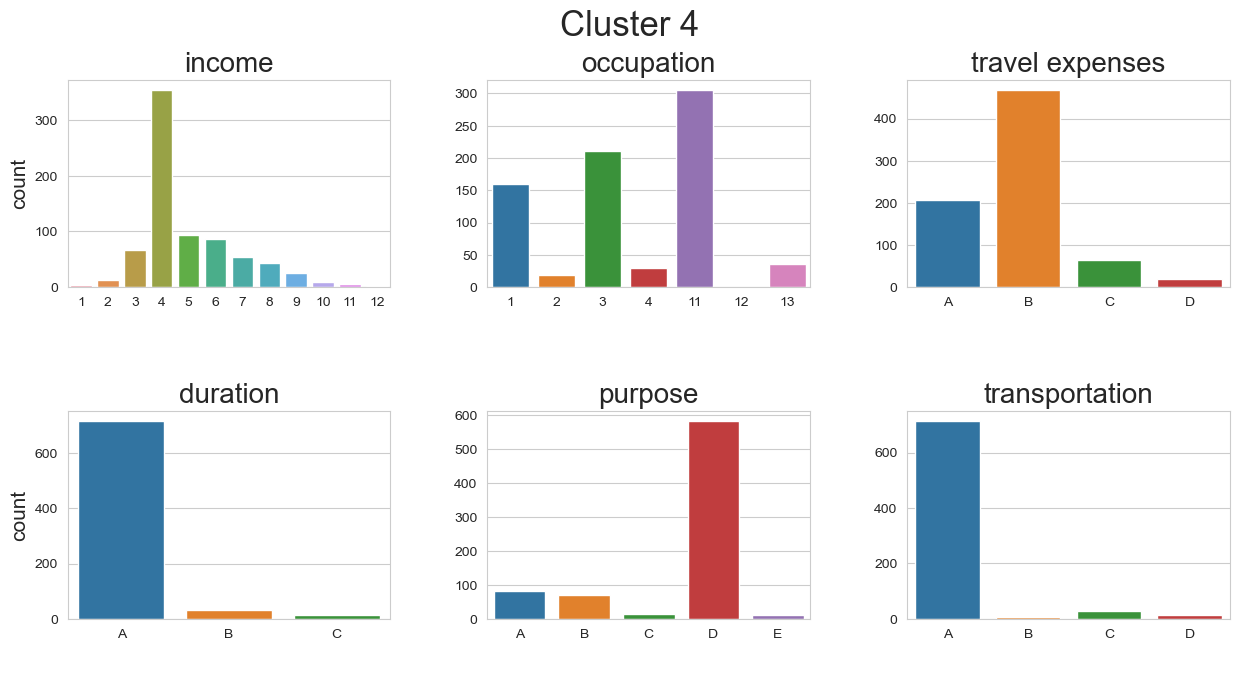

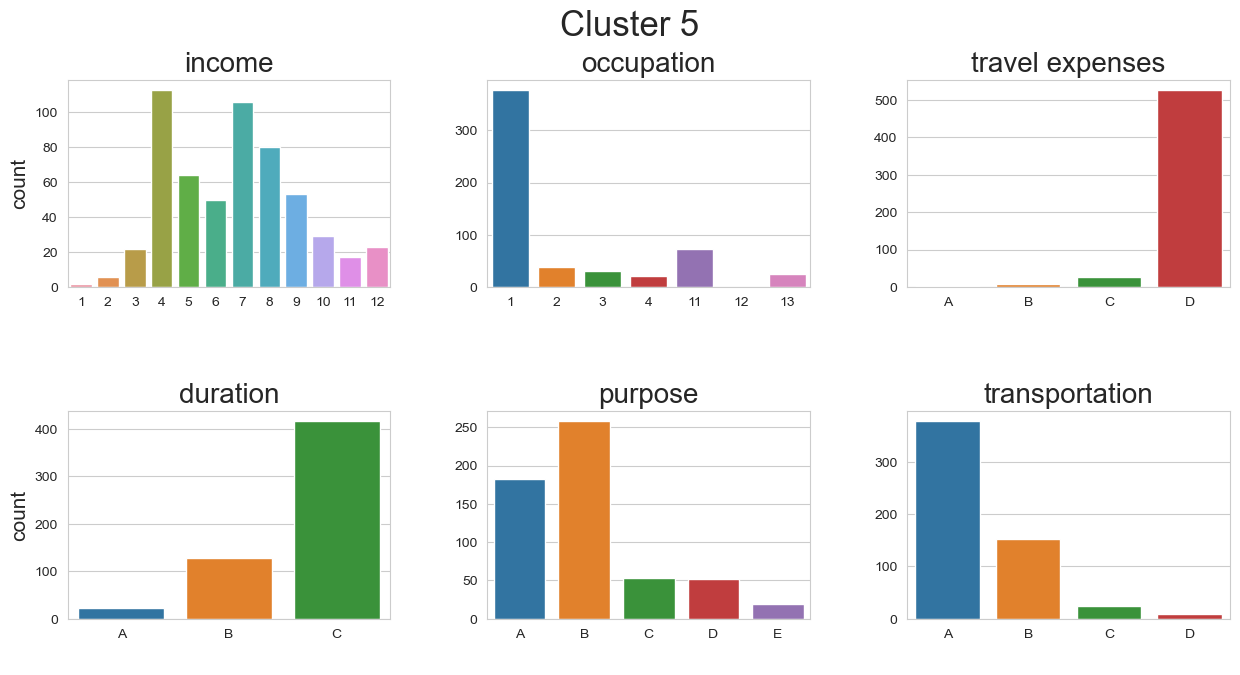

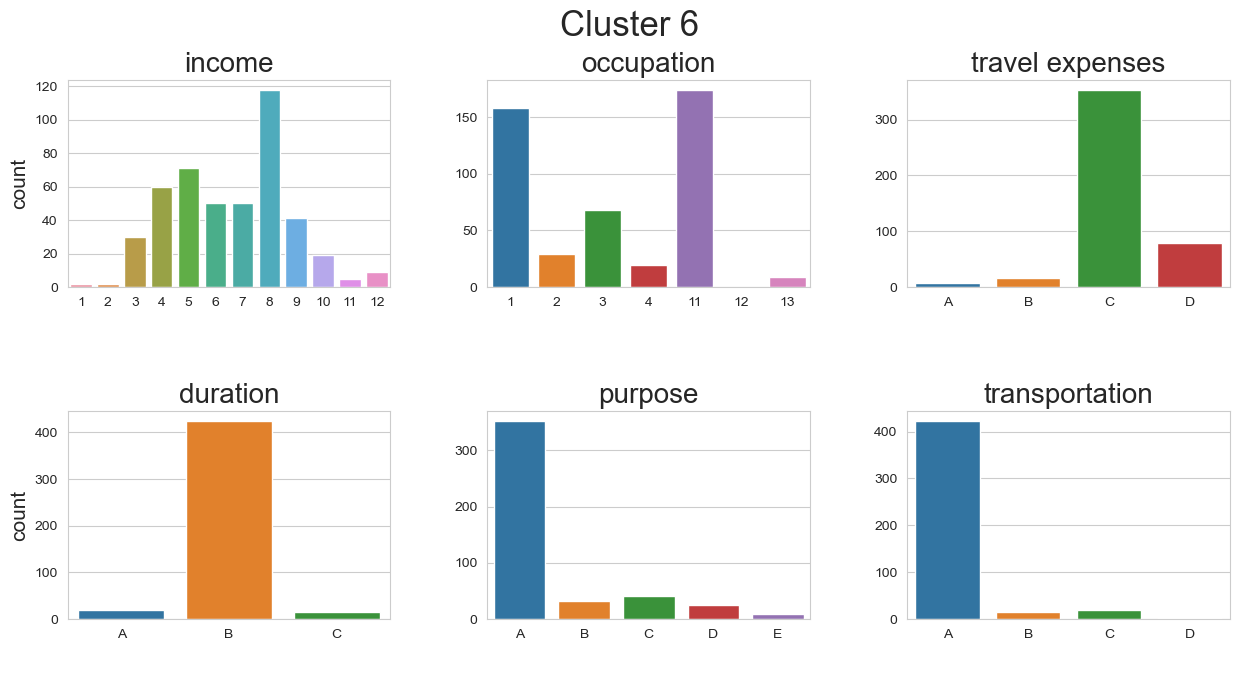

In [33]:
# 시각화 함수 정의 및 시각화

def Visualization_c(clus, col):
    fig = plt.figure(figsize=(15, 7))
    sns.set_style('whitegrid')
    fig.suptitle('Cluster {}'.format(clus), fontsize=25)

    order_a = [1,2,3,4,5,6,7,8,9,10,11,12]
    order_b = [1,2,3,4,11,12,13]
    order_c = ['A', 'B', 'C', 'D']
    order_d = ['A', 'B', 'C']
    order_e = ['A', 'B', 'C', 'D', 'E']
    order_f = ['A', 'B', 'C', 'D']

    ax1 = fig.add_subplot(231)
    ax1.set_title('income', fontsize=20)
    sns.countplot(x='DQ6B', data=senior_df.loc[senior_df[col] == clus], order=order_a)  
    ax1.set_xlabel(' ', fontsize=15)
    ax1.set_ylabel('count', fontsize=15)

    ax2 = fig.add_subplot(232)
    ax2.set_title('occupation', fontsize=20)
    sns.countplot(x='BJOB', data=senior_df.loc[senior_df[col] == clus], order=order_b) 
    ax2.set_xlabel(' ', fontsize=15)
    ax2.set_ylabel(' ')

    ax3 = fig.add_subplot(233)
    ax3.set_title('travel expenses', fontsize=20)
    sns.countplot(x='Cost_Quantile', data=senior_df.loc[senior_df[col] == clus], order=order_c) 
    ax3.set_xlabel(' ', fontsize=15)
    ax3.set_ylabel(' ')

    ax4 = fig.add_subplot(234)
    ax4.set_title('duration', fontsize=20)
    sns.countplot(x='AVG_TRAVEL_PERIOD', data=senior_df.loc[senior_df[col] == clus], order=order_d)  
    ax4.set_xlabel(' ', fontsize=15)
    ax4.set_ylabel('count', fontsize=15)

    ax5 = fig.add_subplot(235)
    ax5.set_title('purpose', fontsize=20)
    sns.countplot(x='여행지_선택', data=senior_df.loc[senior_df[col] == clus], order=order_e)  
    ax5.set_xlabel(' ', fontsize=15)
    ax5.set_ylabel(' ')

    ax6 = fig.add_subplot(236)
    ax6.set_title('transportation', fontsize=20)
    sns.countplot(x='교통_선택', data=senior_df.loc[senior_df[col] == clus], order=order_f)  
    ax6.set_xlabel(' ', fontsize=15)
    ax6.set_ylabel(' ')

    plt.subplots_adjust(wspace=0.3, hspace=0.6)

for i in senior_df.cluster.value_counts().index:
    Visualization_c(i, 'cluster')

In [19]:
senior_df['cluster'] = clusters + 1

In [20]:
senior_df_cluster = df[df['BAGE'].isin([5, 6])]
senior_df_cluster = senior_df_cluster[senior_df_cluster['국내_여행여부'].isin([1])]


senior_df_cluster['cluster'] = '0'
senior_df_cluster['cluster'] = senior_df['cluster']

In [21]:
senior_df_cluster.columns

Index(['국내_여행여부', 'ID', 'D_TRA1_ONE_COST', 'D_TRA2_ONE_COST',
       'D_TRA3_ONE_COST', 'D_TRA4_ONE_COST', 'BSEX', 'A7', 'D_TRA5_ONE_COST',
       'D_TRA6_ONE_COST', 'DQ6B', 'A1_1', 'SA1_1', 'SA1_2', 'D_TRA1_S_Day',
       'D_TRA2_S_Day', 'D_TRA3_S_Day', 'D_TRA4_S_Day', 'D_TRA5_S_Day',
       'D_TRA6_S_Day', 'A4_1', 'BAGE', 'BJOB', 'A6_1', 'cluster'],
      dtype='object')

<AxesSubplot:title={'center':'cluster 1'}>

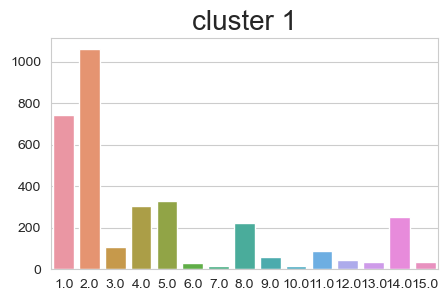

In [41]:
import matplotlib.pyplot as plt

# 원하는 군집과 변수 입력

a = senior_df_cluster[senior_df_cluster['cluster'] == 1]['A4_1'].value_counts()

# 시각화
plt.figure(figsize=(5,3))
plt.title('cluster 1', fontsize = 20)
sns.barplot(x=a.index, y=a.values)

In [ ]:
# Example: Using a different color palette
sns.countplot(x='DQ6B', data=senior_df.loc[senior_df[col] == clus], order=order_a, palette='pastel')

# Example: Using a different theme
sns.set_theme(style='whitegrid')  # Change the theme to 'whitegrid'

# Example: Changing axis label and title font styles
ax1.set_xlabel('X Label', fontsize=12, fontweight='bold')
ax1.set_ylabel('Y Label', fontsize=12, fontweight='bold')
ax1.set_title('Income Distribution', fontsize=18, fontweight='bold')

# Example: Rotating x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis tick labels by 45 degrees


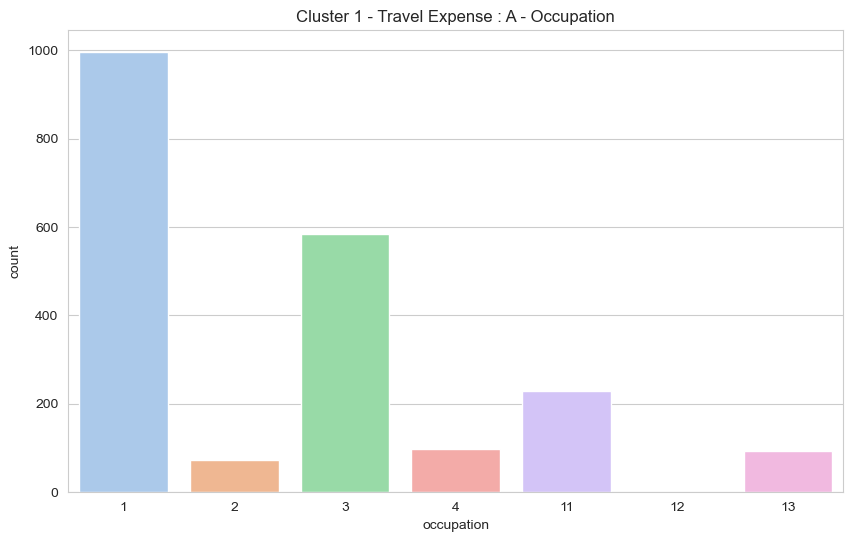

In [289]:
# cluster 1에서 travel expense 가 A인 사람들의 occupation

cluster_1_travel_A = senior_df[(senior_df['cluster'] == 1) & (senior_df['Cost_Quantile'] == 'A')]

occupation_counts = cluster_1_travel_A['BJOB'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='pastel')
plt.title('Cluster 1 - Travel Expense : A - Occupation')
plt.xlabel('occupation')
plt.ylabel('count')
plt.show()


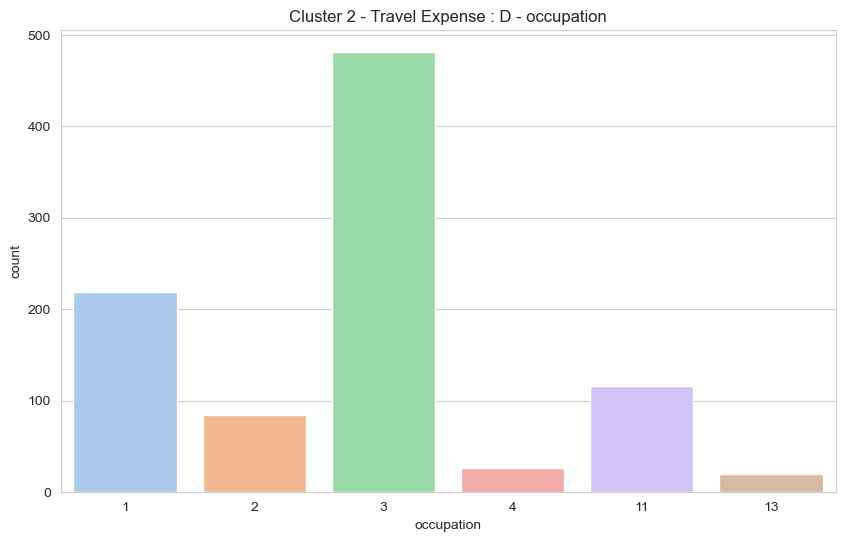

In [312]:
# cluster 2에서 travel expenses D인 사람들의 occupation

cluster_2_travel_D = senior_df[(senior_df['cluster'] == 2) & (senior_df['Cost_Quantile'] == 'D')]

occupation_counts = cluster_2_travel_D['BJOB'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='pastel')
plt.title('Cluster 2 - Travel Expense : D - occupation')
plt.xlabel('occupation')
plt.ylabel('count')
plt.show()

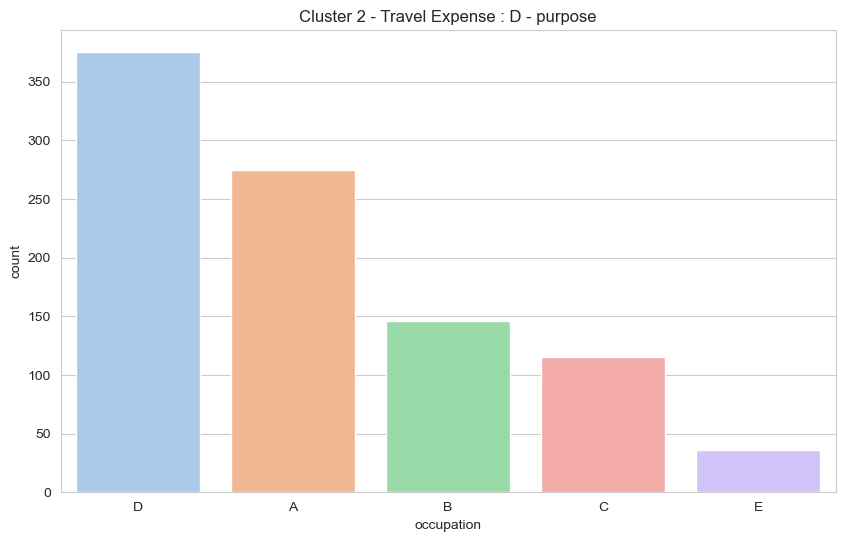

In [314]:
# cluster 2에서 travel expenses D인 사람들의 purpose

cluster_2_travel_D = senior_df[(senior_df['cluster'] == 2) & (senior_df['Cost_Quantile'] == 'D')]

occupation_counts = cluster_2_travel_D['여행지_선택'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='pastel')
plt.title('Cluster 2 - Travel Expense : D - purpose')
plt.xlabel('occupation')
plt.ylabel('count')
plt.show()

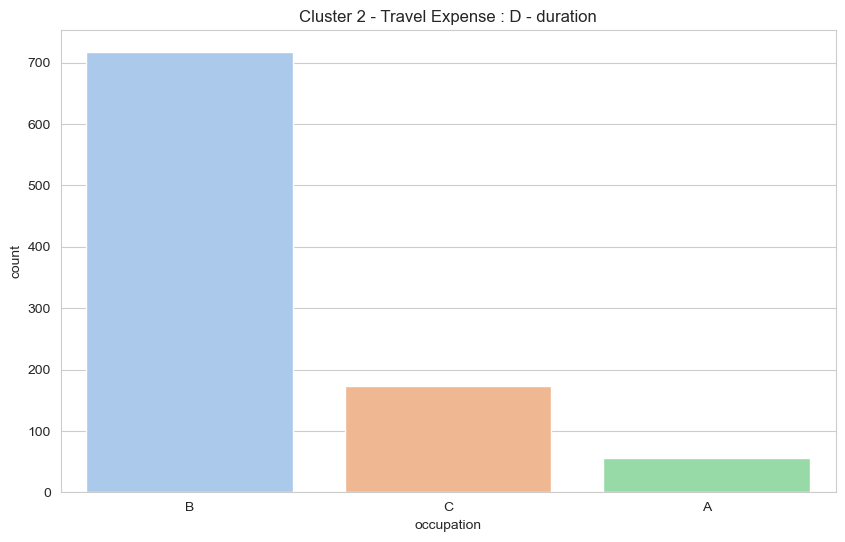

In [313]:
# cluster 2에서 travel expenses D인 사람들의 duration

cluster_2_travel_D = senior_df[(senior_df['cluster'] == 2) & (senior_df['Cost_Quantile'] == 'D')]

occupation_counts = cluster_2_travel_D['AVG_TRAVEL_PERIOD'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='pastel')
plt.title('Cluster 2 - Travel Expense : D - duration')
plt.xlabel('occupation')
plt.ylabel('count')
plt.show()

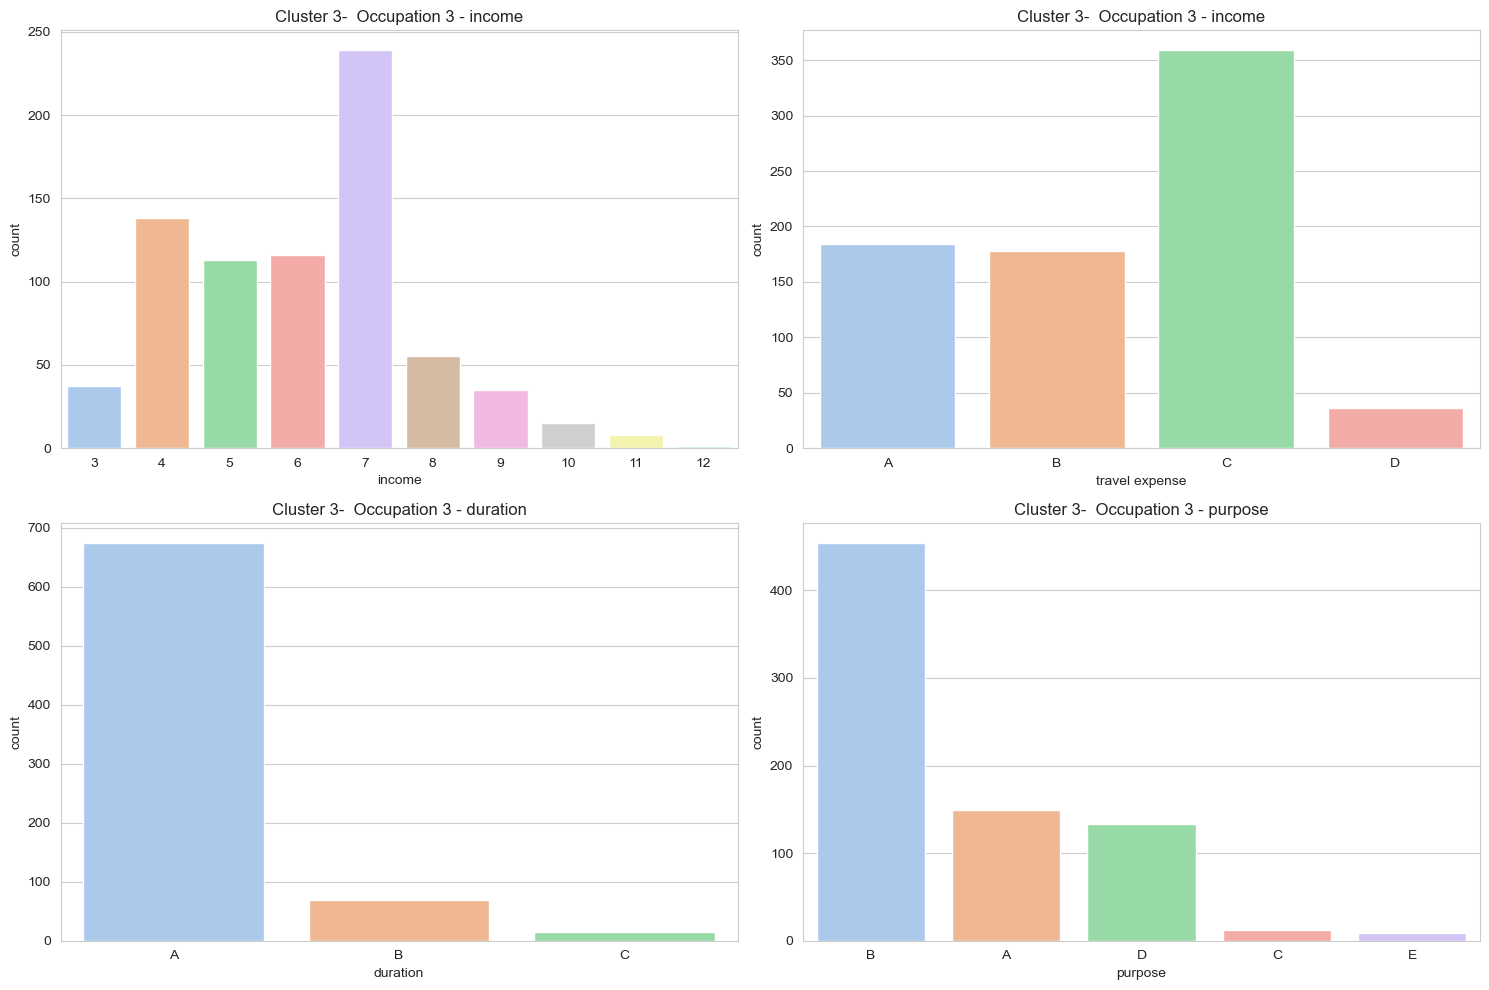

In [297]:
# cluster 3에서 occupation 3인 사람들의 income, travel expense, duration, purpose는 어떻게 되는지

cluster_3_occupation_3 = senior_df[(senior_df['cluster'] == 3) & (senior_df['BJOB'] == 3)]
income_counts = cluster_3_occupation_3['DQ6B'].value_counts()
travel_expense_counts = cluster_3_occupation_3['Cost_Quantile'].value_counts()
duration_counts = cluster_3_occupation_3['AVG_TRAVEL_PERIOD'].value_counts()
purpose_counts = cluster_3_occupation_3['여행지_선택'].value_counts()

sns.set_style('whitegrid')

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.barplot(x=income_counts.index, y=income_counts.values, palette='pastel')
plt.title('Cluster 3-  Occupation 3 - income')
plt.xlabel('income')
plt.ylabel('count')

plt.subplot(222)
sns.barplot(x=travel_expense_counts.index, y=travel_expense_counts.values, palette='pastel')
plt.title('Cluster 3-  Occupation 3 - income')
plt.xlabel('travel expense')
plt.ylabel('count')

plt.subplot(223)
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='pastel')
plt.title('Cluster 3-  Occupation 3 - duration')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(224)
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')
plt.title('Cluster 3-  Occupation 3 - purpose')
plt.xlabel('purpose')
plt.ylabel('count')

plt.tight_layout()
plt.show()


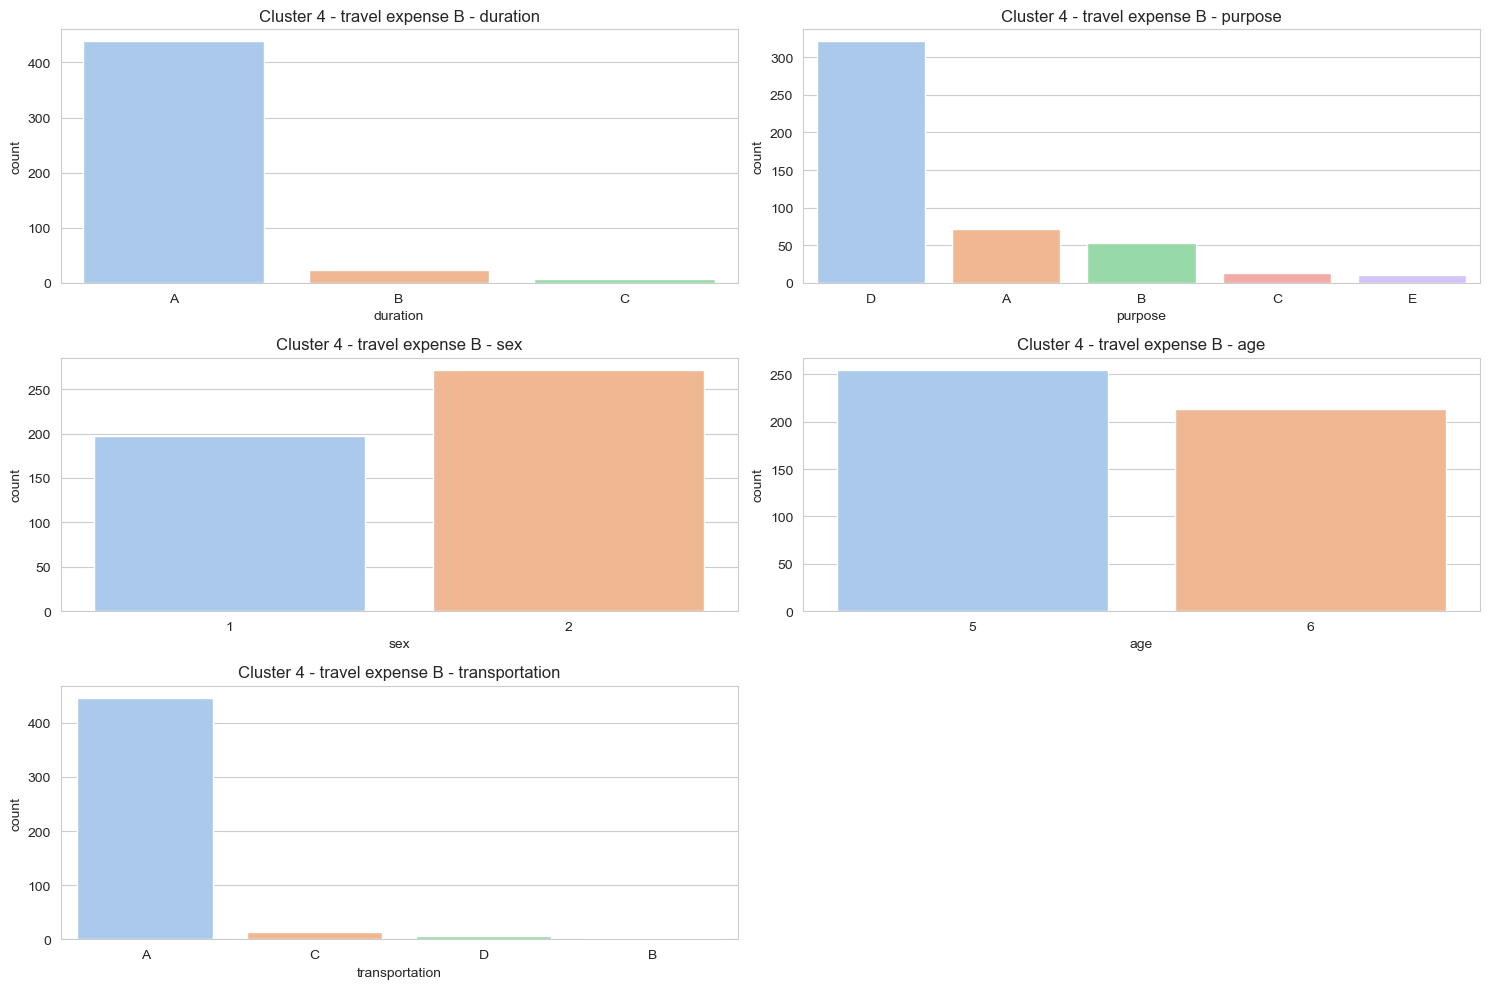

In [306]:
# cluster 4에서 travel expense B인 사람들의 성별, 나이, duration, purpose, transportation 은 어떻게 되는지

cluster_4_expense_B = senior_df[(senior_df['cluster'] == 4) & (senior_df['Cost_Quantile'] == 'B')]
duration_counts = cluster_4_expense_B['AVG_TRAVEL_PERIOD'].value_counts()
purpose_counts = cluster_4_expense_B['여행지_선택'].value_counts()
sex_counts = cluster_4_expense_B['BSEX'].value_counts()
age_count = cluster_4_expense_B['BAGE'].value_counts()
transportation_count = cluster_4_expense_B['교통_선택'].value_counts()

sns.set_style('whitegrid')

plt.figure(figsize=(15, 10))

plt.subplot(321)
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='pastel')
plt.title('Cluster 4 - travel expense B - duration')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(322)
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')
plt.title('Cluster 4 - travel expense B - purpose')
plt.xlabel('purpose')
plt.ylabel('count')

plt.subplot(323)
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')
plt.title('Cluster 4 - travel expense B - sex')
plt.xlabel('sex')
plt.ylabel('count')

plt.subplot(324)
sns.barplot(x=age_count.index, y=age_count.values, palette='pastel')
plt.title('Cluster 4 - travel expense B - age')
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(325)
sns.barplot(x=transportation_count.index, y=transportation_count.values, palette='pastel')
plt.title('Cluster 4 - travel expense B - transportation')
plt.xlabel('transportation')
plt.ylabel('count')

plt.tight_layout()
plt.show()

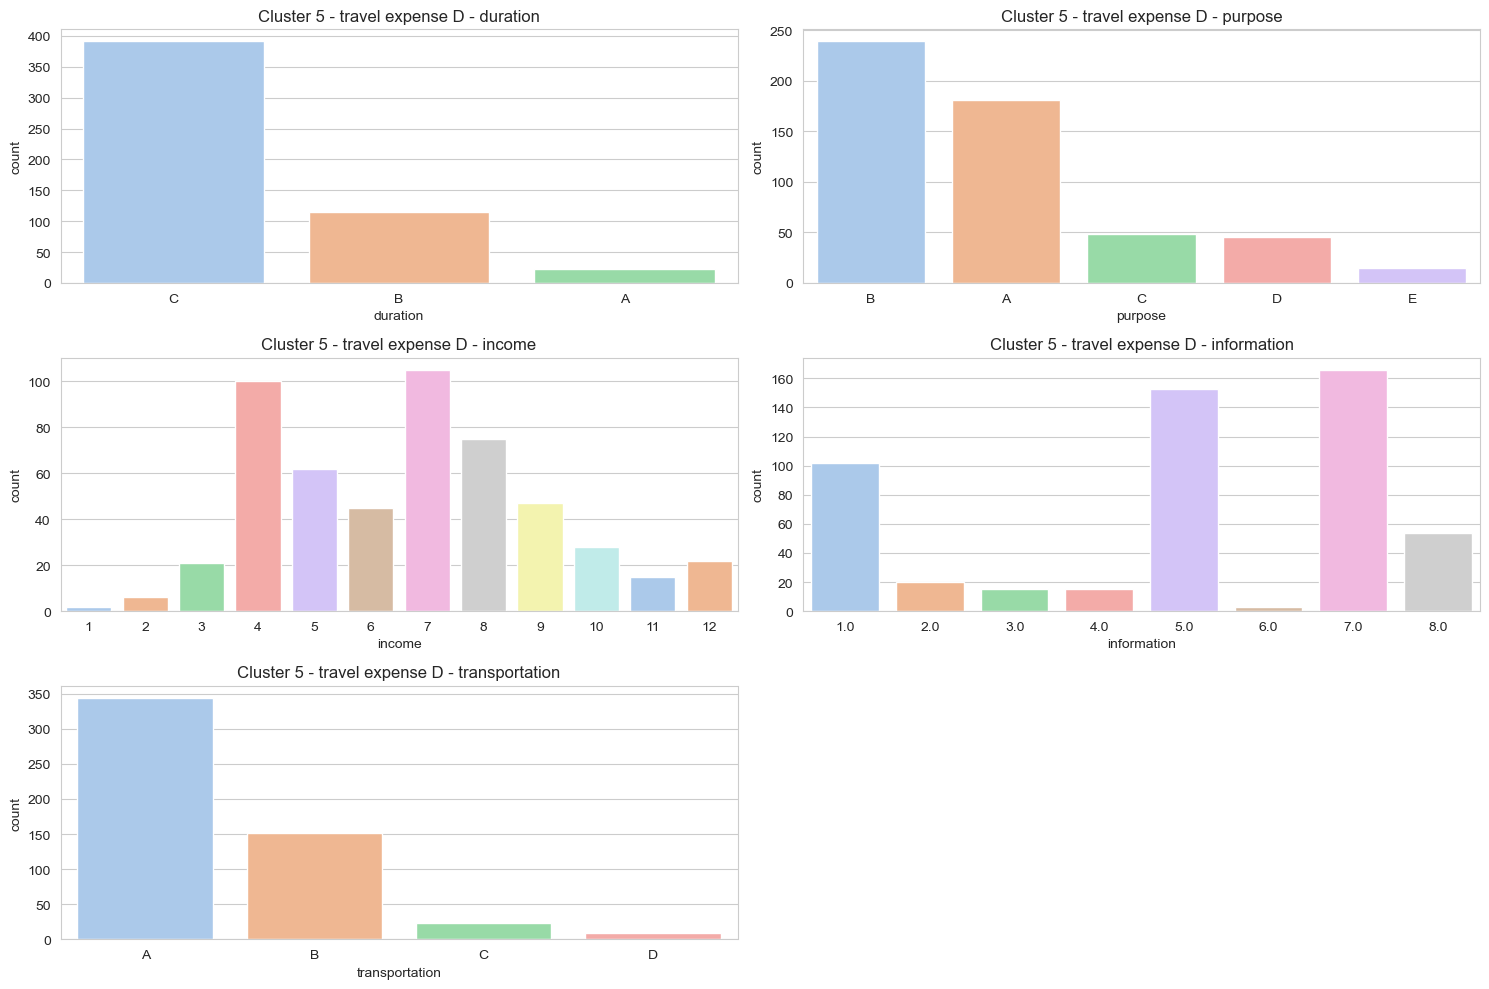

In [311]:
# cluster 5 안에서 travel expense D인 사람들의 duration, income, purpose, transportation (가능하다면 여행정보 획득경로까지) 어떻게 되는지

cluster_5_expense_D = senior_df[(senior_df['cluster'] == 5) & (senior_df['Cost_Quantile'] == 'D')]
duration_counts = cluster_5_expense_D['AVG_TRAVEL_PERIOD'].value_counts()
purpose_counts = cluster_5_expense_D['여행지_선택'].value_counts()
income_counts = cluster_5_expense_D['DQ6B'].value_counts()
information_counts = cluster_5_expense_D['A6_1'].value_counts()
transportation_count = cluster_5_expense_D['교통_선택'].value_counts()

sns.set_style('whitegrid')

plt.figure(figsize=(15, 10))

plt.subplot(321)
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='pastel')
plt.title('Cluster 5 - travel expense D - duration')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(322)
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')
plt.title('Cluster 5 - travel expense D - purpose')
plt.xlabel('purpose')
plt.ylabel('count')

plt.subplot(323)
sns.barplot(x=income_counts.index, y=income_counts.values, palette='pastel')
plt.title('Cluster 5 - travel expense D - income')
plt.xlabel('income')
plt.ylabel('count')

plt.subplot(324)
sns.barplot(x=information_counts.index, y=information_counts.values, palette='pastel')
plt.title('Cluster 5 - travel expense D - information')
plt.xlabel('information')
plt.ylabel('count')

plt.subplot(325)
sns.barplot(x=transportation_count.index, y=transportation_count.values, palette='pastel')
plt.title('Cluster 5 - travel expense D - transportation')
plt.xlabel('transportation')
plt.ylabel('count')

plt.tight_layout()
plt.show()

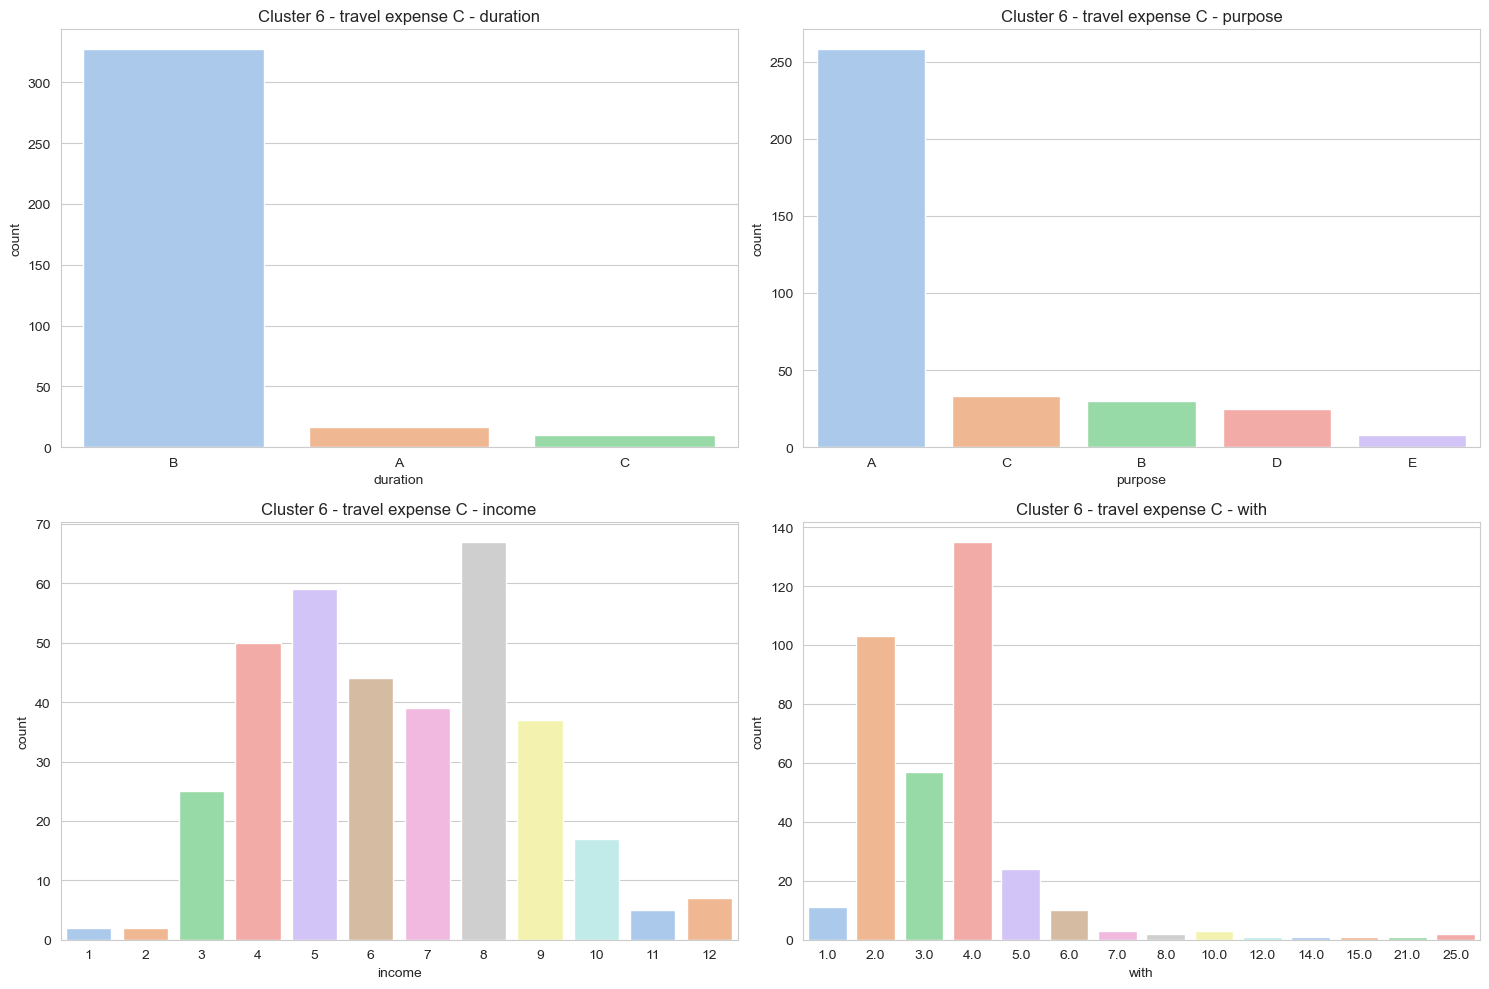

In [308]:
# cluster 6 집단내 travel expense C인 사람들의 duration, income, purpose, 여행 동반자 수는 어떻게 되는지 

cluster_6_expense_C = senior_df[(senior_df['cluster'] == 6) & (senior_df['Cost_Quantile'] == 'C')]
duration_counts = cluster_6_expense_C['AVG_TRAVEL_PERIOD'].value_counts()
purpose_counts = cluster_6_expense_C['여행지_선택'].value_counts()
income_counts = cluster_6_expense_C['DQ6B'].value_counts()
with_counts = cluster_6_expense_C['A7'].value_counts()


sns.set_style('whitegrid')

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='pastel')
plt.title('Cluster 6 - travel expense C - duration')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(222)
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')
plt.title('Cluster 6 - travel expense C - purpose')
plt.xlabel('purpose')
plt.ylabel('count')

plt.subplot(223)
sns.barplot(x=income_counts.index, y=income_counts.values, palette='pastel')
plt.title('Cluster 6 - travel expense C - income')
plt.xlabel('income')
plt.ylabel('count')

plt.subplot(224)
sns.barplot(x=with_counts.index, y=with_counts.values, palette='pastel')
plt.title('Cluster 6 - travel expense C - with')
plt.xlabel('with')
plt.ylabel('count')

plt.tight_layout()
plt.show()